In [13]:
!start .

# <font color =blue> Examen   </font>

Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

<font color = blue> - El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera. <font>


JESUS MARIO DAVIZON LOPEZ

In [2]:
%matplotlib inline 

import sympy as sym
import numpy as np
import matplotlib.pylab as plt

from sympy import init_printing; init_printing(use_latex='mathjax')
from IPython.display import display
from IPython.display import HTML
from scipy.integrate import odeint

from sympy import *
from scipy.optimize import linprog


from ipywidgets import *

Ley_Newton_enfriamiento='<iframe src=https://es.wikipedia.org/wiki/Ley_del_enfriamiento_de_Newton?useformat=mobile width=700 height=350></iframe>'
Torricelli='<iframe src=https://en.wikipedia.org/wiki/Torricelli%27s_law?useformat=mobile width=700 height=350></iframe>'
Caidalibre ='<iframe src=https://es.wikipedia.org/wiki/Ca%C3%ADda_libre?useformat=mobile width=700 height=350></iframe>'

sym.var('k t x')

T = sym.Function('T')

# <font color =blue>Primer punto.</font>

## Introducción al problema. 

### Ley de Newton del enfriamiento

La ley empírica de Newton, relativa al enfriamiento de un objeto, se expresa con la ecuación diferencial lineal de primer orden

$$\frac{dT}{dt} = k(T - Tm) $$

donde $k$ es una constante de proporcionalidad, $T(t)$ es la temperatura del objeto cuando $t > 0$
y $T_m$ es la temperatura ambiente; o sea, la temperatura del medio que rodea al objeto. 

Supondremos que $T_m$ es constante.

### Para más información revise la siguiente pagina. 

In [2]:
HTML(Ley_Newton_enfriamiento)

HTML(value='<iframe src=https://es.wikipedia.org/wiki/Ley_del_enfriamiento_de_Newton?useformat=mobile width=70…

## <font color = red> Problema 1 <font>

### ¿Cuánto esperar para tomar el café?

Primero calentamos el agua a $80°C$. Posteriormente agregamos café al vaso con el agua caliente. Después realizamos la medición de la temperatura ambiente, la cual fue de $24°C$. Realiza las siguientes actividades:
]
1. (20 puntos) Simula el sistema en un tiempo de $0$ a $120$ unidades de tiempo  con una constante de proporcionalidad $k=-0.0565$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a $30°C$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para valores de $k >0$?
    - (5  puntos) Busca una constante de proporcionalidad $k$ en un rango ( de $-0.2$ a $0.2$ con incremento de 0.01), para la cual el cafe tiene una temperatura menor de $30°C$ en un tiempo a 20 minutos.

2. La temperatura es menor a los 30°C a partir de los 39.532605690391044 minutos 


La temperatura es  25.025675777769113 °C a los  20  minutos, considerando una k= -0.2
La temperatura es  25.252763223945273 °C a los  20  minutos, considerando una k= -0.19
La temperatura es  25.530128457048384 °C a los  20  minutos, considerando una k= -0.18
La temperatura es  25.868903117778263 °C a los  20  minutos, considerando una k= -0.16999999999999998
La temperatura es  26.28268342278851 °C a los  20  minutos, considerando una k= -0.15999999999999998
La temperatura es  26.788075828600384 °C a los  20  minutos, considerando una k= -0.14999999999999997
La temperatura es  27.40536350701221 °C a los  20  minutos, considerando una k= -0.13999999999999996
La temperatura es  28.159320380002704 °C a los  20  minutos, considerando una k= -0.12999999999999995
La temperatura es  29.080205384207108 °C a los  20  minutos, considerando una k= -0.11999999999999994

3. Para valores de k positivos la temperatura

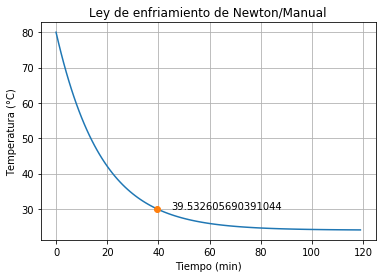

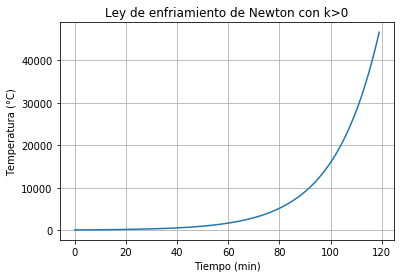

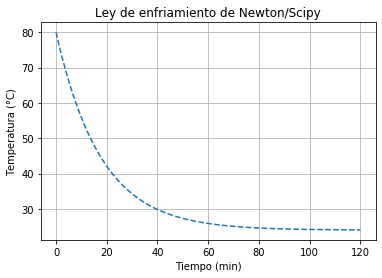

<Figure size 432x288 with 0 Axes>

In [9]:
from numpy import *
from math import *
#from scipy import stats
#from scipy.integrate import quad
from scipy.integrate import odeint
import scipy.integrate as spi
import matplotlib.pylab as plt
from sympy import *
import pandas as pd
import numpy as np
import sympy as sp
import sympy as sym

#Procedimiento manual

k=-0.0565
Tm=24
c=56
temp=30

#ANALISIS DE FUNCION ORIGINAL, CUANDO EL TIEMPO TIENDE A INFINITO, LA TEMPERATURA PASA A SER LA TEMPERATURA DEL AMBIENTE
t=arange(120)
T=c*np.exp(k*t)+Tm

t1=np.log((temp-Tm)/c)/k

print("2. La temperatura es menor a los 30°C a partir de los" , t1 , "minutos \n\n")

plt.plot(t,T)
plt.plot(t1,temp,'o')
plt.text(45, 30, str(t1)) 
plt.grid()

plt.title('Ley de enfriamiento de Newton/Manual')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.figure()

#ANALISIS DE FUNCION CON k positiva -> En vez de decrecer, la temperatura aumenta de forma exponencial
k=0.0565
t=arange(120)
T=c*np.exp(k*t)+Tm

plt.plot(t,T)
plt.grid()

plt.title('Ley de enfriamiento de Newton con k>0')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')


k1=arange(-0.2,0.21,0.01)
for i in t:
    for j in k1:
        T=c*np.exp(j*i)+Tm      
        if T<30 and i==20:
            print("La temperatura es " ,T, "°C a los ", i, " minutos, considerando una k=",j)
        

#Procedimiento haciendo uso de scipy e integrate

k=-0.0565
Tm=24

#Funcion para la ecuacion diferencial
def f(y,x):
    return k*(y-Tm)

y0=80
x=np.linspace(0,120,100)

sol=odeint(f,y0,x)
fig, axes =plt.subplots()
axes.plot(x,sol,'--')
plt.grid()
plt.title('Ley de enfriamiento de Newton/Scipy')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.figure()

print("\n3. Para valores de k positivos la temperatura en vez de disminuir crecería exponencialmente")


## <font color = red> Problema 2 <font>  

### ¿Cuánto esperar para comenzar a comer pastel?

Al sacar un pastel del horno, su temperatura es $280°C$. Después de $3$ minutos, $2OO°C$. ¿En cuanto tiempo se enfriará hasta la temperatura ambiente de $28°C$? Realiza las siguientes actividades:

1. (20 puntos) Simula el sistema en un tiempo de $0$ a $60$ unidades de tiempo  con una constante de proporcionalidad $k=-0.14518$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a $150°C$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para valores de $k >0$?
    - (5  puntos) Busca una constante de proporcionalidad $k$ en un rango ( de $-0.2$ a $0.2$ con incremento de 0.01), para la cual el pastel se puede comer a una temperatura menor a $50°C$ en un tiempo a 10 minutos.


No hay un valor de k en el rango de -0.2 a 0.2 que permita comer el pastel a menos de 50°C en un tiempo de 10 minutos

Incrementamos el rango de valores de k de -0.3 a 0.3 y se obtuvo lo siguiente:

La temperatura es  36.74548950217317 °C a los  10  minutos, considerando una k= -0.3
La temperatura es  38.08594433444025 °C a los  10  minutos, considerando una k= -0.29
La temperatura es  39.567376032055805 °C a los  10  minutos, considerando una k= -0.27999999999999997
La temperatura es  41.204611261375945 °C a los  10  minutos, considerando una k= -0.26999999999999996
La temperatura es  43.014036022869476 °C a los  10  minutos, considerando una k= -0.25999999999999995
La temperatura es  45.0137596477181 °C a los  10  minutos, considerando una k= -0.24999999999999994
La temperatura es  47.22379604208962 °C a los  10  minutos, considerando una k= -0.23999999999999994
La temperatura es  49.666263993037774 °C a los  10  minutos, considerando una k= -0.22999999999999993


2. La temperatura 

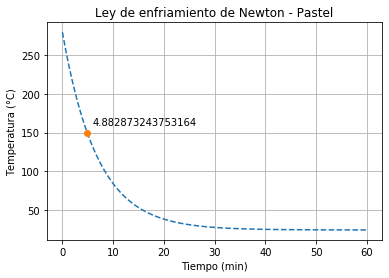

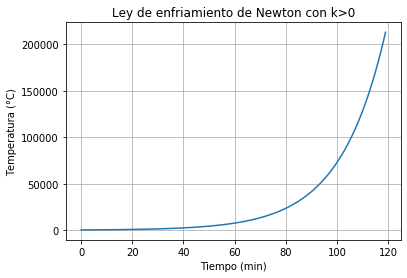

In [7]:
from numpy import *
from math import *
import matplotlib.pylab as plt
from sympy import *
from scipy.integrate import odeint
import pandas as pd
import numpy as np
import sympy as sp
import sympy as sym


#Procedimiento haciendo uso de scipy e integrate
k=-0.14518
Tm=24

#Funcion para la ecuacion diferencial
def f(y,x):
    return k*(y-Tm)

y0=280
x=np.linspace(0,60,100)

sol=odeint(f,y0,x)
fig, axes =plt.subplots()
axes.plot(x,sol,'--')

t=arange(60)
Tm=24
c=256
temp=150

t1=np.log((temp-Tm)/c)/k
plt.plot(t1,temp,'o')
plt.text(6, 160, str(t1)) 
plt.grid()

plt.title('Ley de enfriamiento de Newton - Pastel')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.figure()

print("\nNo hay un valor de k en el rango de -0.2 a 0.2 que permita comer el pastel a menos de 50°C en un tiempo de 10 minutos")
print("\nIncrementamos el rango de valores de k de -0.3 a 0.3 y se obtuvo lo siguiente:\n")
k1=arange(-0.3,0.31,0.01)
for i in t:
    for j in k1:
        T=c*np.exp(j*i)+Tm      
        if T<50 and i==10:
            print("La temperatura es " ,T, "°C a los ", i, " minutos, considerando una k=",j)

            
            
#ANALISIS DE FUNCION CON k positiva -> En vez de decrecer, la temperatura aumenta de forma exponencial
k=0.0565
t=arange(120)
T=c*np.exp(k*t)+Tm

plt.plot(t,T)
plt.grid()

plt.title('Ley de enfriamiento de Newton con k>0')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')

print("\n\n2. La temperatura es menor a 150°C a partir del minuto:", t1)
print("\n3. Para valores de k positivos el pastel en vez de comenzar a enfriarse se seguiría calentando exponencialmente")



In [1]:
# Solucion opcion 3  :  

# <font color =blue>Segundo punto.</font>

## Introducción al problema. 

### Caída libre

En la caída libre ideal, se desprecia la resistencia aerodinámica que presenta el aire al movimiento del cuerpo, analizando lo que pasaría en el vacío. En esas condiciones, la aceleración que adquiriría el cuerpo sería debida exclusivamente a la gravedad, siendo independiente de su masa.

$$
\begin{eqnarray}
\frac{ds}{dt} &=& v \\
\frac{dv}{dt} &=& -g
\end{eqnarray}
$$

O visto el sistema en forma canónica

$$
\begin{eqnarray}
\dot{x}_1 &=& x_2 \\
\dot{x}_2 &=& -g
\end{eqnarray}
$$


### Para más información revise la siguiente pagina. 

In [3]:
HTML(Caidalibre)

HTML(value='<iframe src=https://es.wikipedia.org/wiki/Ca%C3%ADda_libre?useformat=mobile width=700 height=350><…

## <font color = red> Problema 3 <font>

### Deja caer una pelota

Desde un edificio de altura de $314$ metros se deja caer una pelota, que tarda 8 segundos en llegar al piso. ¿con que velocidad impacta la pelota contra el piso?


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $8$ unidades de tiempo  con una constante de gravedad $g=-9.8$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un segundo. ¿En que tiempo aproximadamente la pelota esta a la mitad del edificio?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para una posicion inicial de $314 m$ y una velocidad de $30 m/s$ ?
    - (5  puntos) ¿Que altura aproximadamente tendra en $10s$ para el incisio anterior?





2) En 5.66046078747399 segundos la pelota esta a la mitad del edificio, considerando la expresion original

3) Considerando una velocidad constante de 30m/s, a los 10 segundos la pelota estara a 14 metros sobre el piso

   Se observa un comportamiento lineal decreciente


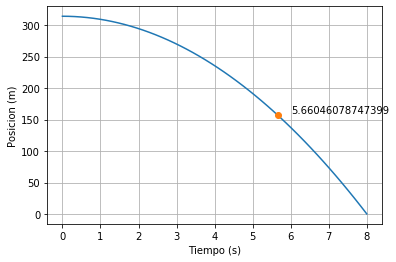

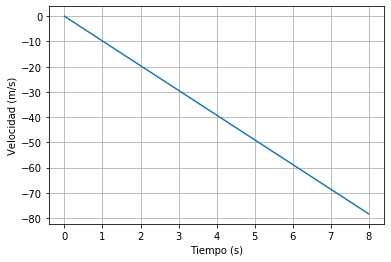

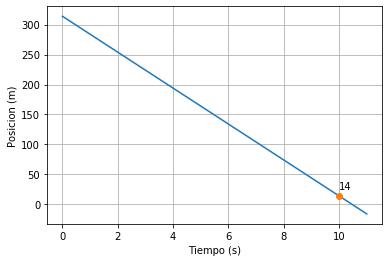

In [12]:
#Procedimiento haciendo uso de scipy e integrate
h=314
g=9.8

#Funcion para la posicion
def fs(s,t):
    return -g*t

#Funcion para la velocidad
def fv(v,a):
    return -g

x=np.linspace(0,8)

c=314
#s=-g*t**2+c
s=c/2
t1=sqrt(2*(c-s)/g)

print("2) En", t1, "segundos la pelota esta a la mitad del edificio, considerando la expresion original")

sol1=odeint(fs,h,x)
fig, axes =plt.subplots()
axes.plot(x,sol1)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Posicion (m)')
plt.plot(t1,s,'o')
plt.text(6, 160, str(t1)) 

v0=0
sol2=odeint(fv,v0,x)
fig, axes =plt.subplots()

axes.plot(x,sol2)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')



#INCISO C

t=np.linspace(0,11)
c=314
s=-30*t+c
s1=-30*10+c

fig, axes =plt.subplots()
axes.plot(t,s)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Posicion (m)')
plt.plot(10,s1,'o')
plt.text(10, 25, str(s1)) 

print("\n3) Considerando una velocidad constante de 30m/s, a los 10 segundos la pelota estara a", s1, "metros sobre el piso")
print("\n   Se observa un comportamiento lineal decreciente")



In [2]:
# Solucion opcion 3

# <font color =blue>Tercer punto.</font>

## Introducción al problema. 

## Drenado de un tanque (Ley de Torricelli)

En hidrodinámica, la ley de Torricelli establece que la velocidad
$v$ de flujo de salida de agua a través de un orificio plano ubicado en la parte inferior
de un tanque lleno hasta una altura $h$ será igual a la velocidad que un cuerpo (en este caso
una gota de agua) adquiriría en caída libre desde una altura $h$; es decir, $v = \sqrt{2gh}$, donde $g$ es la aceleración debida a la gravedad.


Suponga que un tanque lleno de agua puede drenar mediante un orificio bajo la influencia de la gravedad. Deseamos encontrar la altura $h$ del agua restante en el tanque en el tiempo $t$.

Si el área del orificio es $A_h$ (en $m^2$) y la velocidad del agua que sale del tanque es $v = \sqrt{2gh}$ (en m/s), entonces el volumen del agua que abandona el tanque por segundo es $A_h \sqrt{2gh}$ (en $m^3$/s). De este modo, si $V(t)$ indica el volumen del agua que hay en el tanque en el tiempo $t$, la ecuación diferencial deseada para la altura del agua en el tiempo t:

$$\frac{dh}{dt} = - \frac{A_h}{A_w} \sqrt{2gh} $$


Donde $A_w$ (en $m^2$) representa el área constante de la superficie superior del agua.

Observe que aquí ignoramos la posibilidad de fricción en el orificio, la cual puede ocasionar una reducción en la velocidad del flujo en
dicho lugar



### Para más información revise la siguiente pagina. 

In [4]:
HTML(Torricelli)

HTML(value='<iframe src=https://en.wikipedia.org/wiki/Torricelli%27s_law?useformat=mobile width=700 height=350…

## <font color = red> Problema 4 <font>

### Drenado de un tanque 

Concidere un cilindro circular con un área constante de $A_w = 5 m^2$, en la parte inferior contiene un orificio de área $A_h = 1 m^2$ el cual podemos estar regulando la salida del liquido. En el interior del tanque se encuentra un liquido el cual tiene una altura inicial en el tiempo $0$ de $h(0)= 10 m$. Realiza las siguientes actividades:

1. (20 puntos) Simula el sistema en un tiempo de $0$ a $6.5$ unidades de tiempo,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la altura del liquido alcanza una altura de $h=2 m$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir si el signo de la ecuación fuera positivo?
    - (5  puntos)  ¿Si el área del orificio $A_h$ es menor a $1 m^2$ que implicaria? Realiza una simulacion y grafica la solución para un orificio de $A_h = .5 m$ 

2) En 3.9413192435040436 minutos el liquido alcanza la altura de 2m

3) Utilizando un valor de Ah menor ocasiona que la funcion tenga un comportamiento mas lineal


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


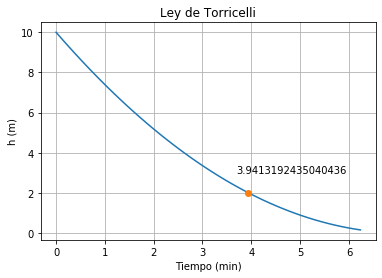

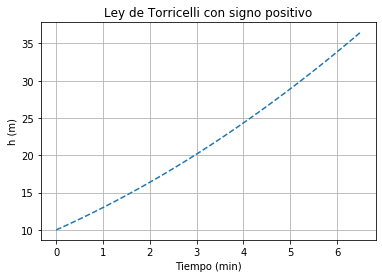

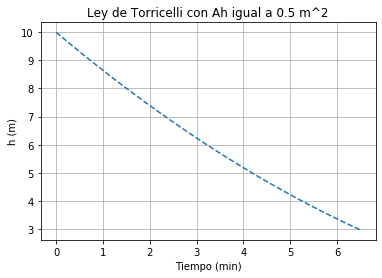

In [76]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt

#Procedimiento haciendo uso de scipy e integrate
Aw=5
Ah=1
h0=10
g=9.81
c=3.16

h1=2

t1=-((h1**(1/2)-c)*(2*Aw))/(Ah*(2*g)**(1/2))
print("2) En",t1,"minutos el liquido alcanza la altura de 2m")

#Funcion para la posicion
def fh(h,t):
    return -(Ah/Aw)*(2*g*h)**(1/2)

x=np.linspace(0,6.5)

sol=odeint(fh,h0,x)
fig, axes =plt.subplots()
axes.plot(x,sol)
plt.title('Ley de Torricelli')
plt.xlabel('Tiempo (min)')
plt.ylabel('h (m)')
plt.plot(t1,2,'o')
plt.text(3.7, 3, str(t1)) 
plt.grid()


#Caso en el que el signo fuera positivo
#Funcion para la posicion
def fh1(h,t):
    return (Ah/Aw)*(2*g*h)**(1/2)

x1=np.linspace(0,6.5)

sol=odeint(fh1,h0,x1)
fig, axes =plt.subplots()
axes.plot(x,sol,'--')
plt.title('Ley de Torricelli con signo positivo')
plt.xlabel('Tiempo (min)')
plt.ylabel('h (m)')
plt.grid()


#Caso en el que el area del orificio es menor a 1 m^2
#Funcion para la posicion
Ah=0.5
def fh2(h,t):
    return -(Ah/Aw)*(2*g*h)**(1/2)

x2=np.linspace(0,6.5)

sol=odeint(fh2,h0,x2)
fig, axes =plt.subplots()
axes.plot(x,sol,'--')
plt.title('Ley de Torricelli con Ah igual a 0.5 m^2')
plt.xlabel('Tiempo (min)')
plt.ylabel('h (m)')
plt.grid()

print("\n3) Utilizando un valor de Ah menor ocasiona que la funcion tenga un comportamiento mas lineal" )


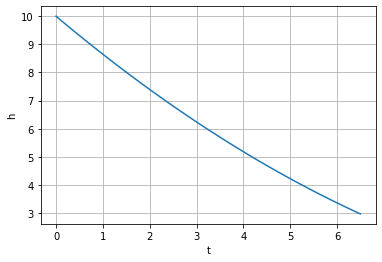

## <font color = red> Problema 5 <font>

### Modelo poblacional 

Simula la siguiente ecuación, y supoga que cada unidad de tiempo corresponde a un minuto.

$$\frac{ds}{dt} = 0.05s(\frac{s}{20}-1)(1-\frac{s}{100}) $$


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $200$ unidades de tiempo, con la condición inicial $s(0) = 21$  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) ¿En que tiempo aproximadamente la poblacion alcanza su maxima capacidad?
3. (15 puntos)
    - (5 puntos) ¿Cual es la capacidad de soporte de este modelo poblacional?
    - (10  puntos) ¿Que pasa con una condición inicial menor (s(0)=21) ? ¿Y con una condición mayor a la capacidad de soporte? 

2) Aproximadamente a los 100 minutos (1 hora con 40 minutos) alcanza su maxima capacidad

3) La capacidad de soporte de este modelo poblacional es de 100
   Si se utiliza una condicion menor a 21, cuando el tiempo tiende a infinito el modelo vale cero
   Conforme se incrementa el valor de la condicion inicial, el modelo alcanza mas rapido la capacidad maxima


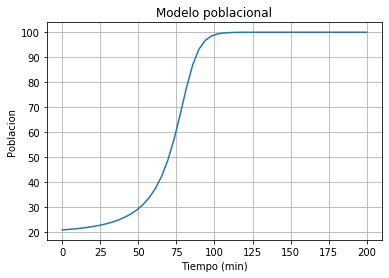

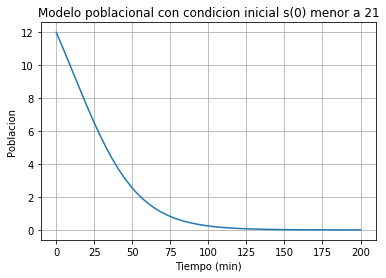

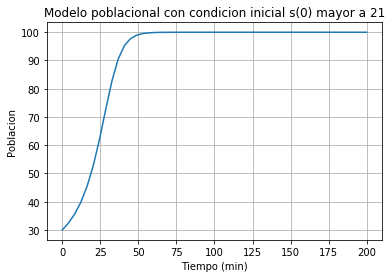

In [4]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt

#Procedimiento haciendo uso de scipy e integrate
s0=21

#Funcion para la posicion
def fs(s,t):
    return 0.05*s*((s/20)-1)*(1-(s/100))

x=np.linspace(0,200)

sol=odeint(fs,s0,x)
fig, axes =plt.subplots()
axes.plot(x,sol)
plt.title('Modelo poblacional')
plt.xlabel('Tiempo (min)')
plt.ylabel('Poblacion')
plt.grid()

print("2) Aproximadamente a los 100 minutos (1 hora con 40 minutos) alcanza su maxima capacidad\n")
print("3) La capacidad de soporte de este modelo poblacional es de 100")
print("   Si se utiliza una condicion menor a 21, cuando el tiempo tiende a infinito el modelo vale cero")
print("   Conforme se incrementa el valor de la condicion inicial, el modelo alcanza mas rapido la capacidad maxima")


#Caso en que la condicion inicial s(0) es menor a 21
s0=12

#Funcion para la posicion
def fs1(s,t):
    return 0.05*s*((s/20)-1)*(1-(s/100))

x1=np.linspace(0,200)

sol=odeint(fs1,s0,x1)
fig, axes =plt.subplots()
axes.plot(x,sol)
plt.title('Modelo poblacional con condicion inicial s(0) menor a 21')
plt.xlabel('Tiempo (min)')
plt.ylabel('Poblacion')
plt.grid()


#Caso en que la condicion inicial s(0) es mayor a 21
s0=30

#Funcion para la posicion
def fs1(s,t):
    return 0.05*s*((s/20)-1)*(1-(s/100))

x1=np.linspace(0,200)

sol=odeint(fs1,s0,x1)
fig, axes =plt.subplots()
axes.plot(x,sol)
plt.title('Modelo poblacional con condicion inicial s(0) mayor a 21')
plt.xlabel('Tiempo (min)')
plt.ylabel('Poblacion')
plt.grid()


## <font color = red> Problema 6 (estabilizar el sistema)<font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema no crezca, y se aproxime a 0 cuando t -> $\infty$.


$$\frac{ds}{dt} = 0.06u $$


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $800$ unidades de tiempo, con la condición inicial $s(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución.
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

3) La funcion de u utilizada para lograr este comportamiento fue: u=-s/6


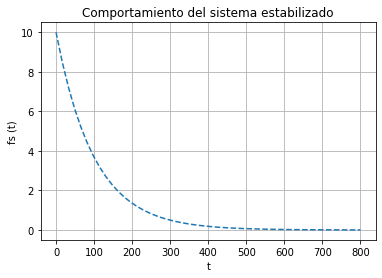

In [83]:
from math import e
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt

#Procedimiento haciendo uso de scipy e integrate
c=10
s0=10

#Funcion para la posicion
def fs(s,t):
    return -0.06*s/6

x=np.linspace(0,800)

#print("2) En", t1, "segundos la pelota esta a la mitad del edificio, considerando la expresion original")

sol=odeint(fs,s0,x)
fig, axes =plt.subplots()
axes.plot(x,sol,'--')
plt.grid()
plt.title('Comportamiento del sistema estabilizado')
plt.xlabel('t')
plt.ylabel('fs (t)')

print("3) La funcion de u utilizada para lograr este comportamiento fue: u=-s/6")

## <font color = red> Problema 7 <font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema no crezca, y se aproxime a 0 cuando t -> $\infty$.


$$\frac{dx}{dt} = 2x^2 + 0.06u $$


1. (20 puntos) Simula el sistema con la condición inicial $x(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución.
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

3) La funcion u utilizada para lograr este comportamiento fue: u=-33.33x^2-x
   La idea fue aplicar una función que eliminara el término cuadrático y en la que se generara una exponencial negativa


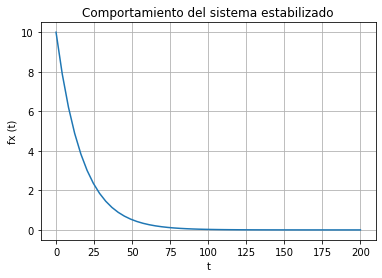

In [84]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt


#Procedimiento haciendo uso de scipy e integrate
x0=10

#Funcion para la posicion
def fx(x,t):
    return 2*x**2+0.06*(-33.33*x**2-x)

t=np.linspace(0,200)

#print("2) En", t1, "segundos la pelota esta a la mitad del edificio, considerando la expresion original")

sol=odeint(fx,x0,t)
fig, axes =plt.subplots()
axes.plot(t,sol)
plt.grid()
plt.title('Comportamiento del sistema estabilizado')
plt.xlabel('t')
plt.ylabel('fx (t)')

print("3) La funcion u utilizada para lograr este comportamiento fue: u=-33.33x^2-x")
print("   La idea fue aplicar una función que eliminara el término cuadrático y en la que se generara una exponencial negativa")

## <font color = red> Problema 8 (seguimiento de trayectorias) <font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema siga una trayectoria. 


$$\frac{dx}{dt} = 2x^2 + 0.06u $$


1. (20 puntos) Simula el sistema con la condición inicial $x(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución siguiendo la funcion de referencia $ x_{ref} = sin(t) $
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

3) La funcion u utilizada para lograr este comportamiento fue: u=-33.33x^2+20sin(t)-10x

   La idea fue aplicar una función que permitiera tener un comportamiento decayente en el tiempo transitorio y que en
   estado estacionario se comportara como la funcion deseada, en este caso un seno


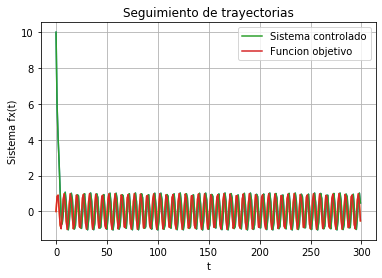

In [85]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt

t=np.arange(300)
y=np.sin(t)

#Procedimiento haciendo uso de scipy e integrate
x0=10

#Funcion para la posicion
def fx(x,t):
    return 2*x**2+0.06*(-33.33*x**2+20*np.sin(t)-10*x)

sol=odeint(fx,x0,t)
fig, axes =plt.subplots()
axes.plot(t,sol)

plt.plot(t,y)
plt.grid()
plt.title('Seguimiento de trayectorias')
plt.xlabel('t')
plt.ylabel('Sistema fx(t)')

plt.plot(sol,label = "Sistema controlado")
plt.plot(y,label = "Funcion objetivo")
plt.legend()

print("3) La funcion u utilizada para lograr este comportamiento fue: u=-33.33x^2+20sin(t)-10x\n")
print("   La idea fue aplicar una función que permitiera tener un comportamiento decayente en el tiempo transitorio y que en")
print("   estado estacionario se comportara como la funcion deseada, en este caso un seno")
      


## <font color = red> Problema 9  <font>


Una empresa de transportes gestiona una flota de 60 carros de tres modelos diferentes. 

- Los tipo X generan una media diaria de $ \$15,000$  pesos. y recorren diariamente una media de $400$ kilómetros. 

- Los tipo Black generan diariamente una media de $\$10,000$ pesos y recorren $300$ kilómetros. 

- Los tipo SUV generan diariamente $\$5,000$ pesos y recorren $100$ km. de media.

Diariamente los carros de la empresa transportan un total de $ \$475$ mil pesos y recorren $12500$ km. entre todos. 

¿Cuántos carros gestiona la empresa de cada modelo?

In [114]:
import numpy as np
#Resolucion por medio de un sistema de ecuaciones lineales de 3 variables

#    x  +   y    +    z   = 60
#15000x + 10000y + 5000z = 475000
# 400x  + 300y   + 100z = 12500

a=np.array([[1,1,1],[15000,10000,5000],[400,300,100]])
b=np.array([60, 475000,12500])
x=np.linalg.solve(a,b)

print(x)
print("La empresa tiene", x[0], "carros de tipo X, ",x[1], "carros de tipo Black y ",x[2], "carros de tipo SUV",)

[ 5. 25. 30.]
La empresa tiene 5.0 carros de tipo X,  25.0 carros de tipo Black y  30.0 carros de tipo SUV


## <font color = red> Problema 10  <font>

Ace Novelty recibió un pedido del Magic World Amusement Park de **900 pandas gigantes, 1200 perros San Bernardo y 2000 pájaros grandes.** La dirección Ace decidió que **500 pandas, 800 perros y 1300 pájaros** pueden ser fabricados **en su planta de Los Ángeles**, y el **resto** del pedido podría realizarse **en la planta de Seattle.**

Cada **panda** requiere **1.5** metros cuadradas de felpa, **30** metros cúbicos de relleno y **5** piezas de adorno; cada **perro** requiere **2** metros cuadradas de felpa, **35** metros cúbicos de relleno y **8** piezas de adorno, y cada **pájaro** requiere **2.5** metros cuadrados de felpa, **25** metros cúbicos de relleno y **15** piezas de adorno. La felpa cuesta **\$4.50** por metro cuadrado, el relleno cuesta **\$0.20** por metros cúbico y las piezas de adorno cuestan **\$0.25** por unidad.

a. Calcule la cantidad de cada tipo de material que se debe comprar para cada planta.

b. ¿Cuál es el costo total de materiales empleados en cada planta y el costo total de los materiales usados por Ace Novelty para cubrir el pedido?

| |Felpa|Relleno|Adorno|
|---|---|---|---|
|Pandas|1.50|  30.00|  5.00|
|Perros|2.00|  35.00|  8.00|
|Pájaros|2.50|  25.00|  15.00|


| |Pandas|Perros|Pájaros|
|---|---|---|---|
|L.A|500|800|1300|
|Seattle|400|400|700|

| | |
|---|---|
|Felpa|4.50|
|Relleno|0.20|
|Adorno|0.25|

A=$\left[
 \begin{array}{ccc}
 1.50 & 30.00 & 5.00  \\
 2.00 & 35.00 & 8.00  \\
 2.50 & 25.00 & 15.00 \\
\end{array} 
\right]$,
P=
$\left[
 \begin{array}{ccc}
 500.00 & 800.00 & 1300.00 \\
 400.00 & 400.00 & 700.00  \\
\end{array} 
\right]$,
C=
$\left[
 \begin{array}{c}
 4.5  \\
 0.2  \\
 0.25
\end{array} 
\right]$

In [148]:
from numpy import matrix
#Resolucion por medio de un sistema de ecuaciones lineales de 3 variables


A=matrix([[1.5,30,5],[2,35,8],[2.5,25,15]])
P=matrix([[500, 800, 1300],[400,400,700]])
C=matrix([[4.5], [0.2], [0.25]])

D=P*A
#print(D)
print("Considerando las dos plantas, las cantidades totales de cada tipo son: \n")
print("Felpa:", D[0,0]+D[1,0]," \n")
print("Relleno:", D[0,1]+D[1,1]," \n")
print("Adorno:", D[0,2]+D[1,2]," \n")

H=D*C
#print(H)

print("Los costos de materiales de cada planta son los siguientes: \n")
print("L.A: $", H[0,0]," \n")
print("Seattle: $", H[1,0]," \n")

print("El costo total de materiales utilizados por Ace Novelty: $" ,H[0,0]+H[1,0])







Considerando las dos plantas, las cantidades totales de cada tipo son: 

Felpa: 8750.0  

Relleno: 119000.0  

Adorno: 44100.0  

Los costos de materiales de cada planta son los siguientes: 

L.A: $ 47400.0  

Seattle: $ 26800.0  

El costo total de materiales utilizados por Ace Novelty: $ 74200.0


In [3]:
# a:La cantidad de cada tipo de material para cada planta,


In [4]:
#b:El costo total de los materiales para cada planta está dada por


In [5]:
#Costo total


## <font color = red> Problema 10  <font>

Aproxima la función exponencial con n=20

$$e^x =\sum_{n=0}^{20} \frac{x^n}{n!}$$

In [167]:
import math
a=0
x=2

for i in range(20):
    a=a+(x**i)/math.factorial(i)
    
print("Tomando x=2 \n")
print("e^2 =", e**x)
print("Aproximacion con sumatoria:", a)




Tomando x=2 

e^2 = 7.3890560989306495
Aproximacion con sumatoria: 7.3890560989301735


## <font color = red> Problema 11  <font>
    
### Construir una cisterna rectangular

Se va a construir una cisterna rectangular con base y tapa cuadradas para almacenar **$12000pies^3$** de agua. Si el concreto para construir la base y los lados tiene un costo de **$100$ por $pie^2$** y el material para construir la **tapa** cuesta **$200$ por $pie^2$** 

¿cuáles son las dimensiones de la cisterna que minimizan el costo de su construcción?

¿Qué se quiere en el problema?

Determinar las dimensiones de la cisterna que minimizan el costo de su construcción.
Suponiendo que las dimensiones de la cisterna son: 
$x$ pies el lado de la base cuadrada y $h$ pies su altura.

¿Cuál es el costo de su construcción?

![](cisterna.png)

Para encontrar las dimensiones ($x$ & $h$) que minimizan el costo de su construcción se necesita la expresión del costo de la cisterna. Usamos la tabla siguiente:

![](tablacisterna.png)

El costo total de la contrucción de la cisterna es:

$$ C = 300x^2 + 400xh \text{   pesos}$$

En el problema aparece la siguiente restricción: **el volumen de la cisterna debe ser igual a $12 000 pies^3$, es decir, que $x^2h = 12000$.**

Tenemos pues:

Una función $C = 300x^2 + 400xh$ y una ecuación $x^2h = 12 000$.
De la ecuación despejamos una de las variables (la que más convenga) para sustituirla en la función. Conviene despejar $h$.

In [62]:
from sympy import Symbol
import sympy as sy

def costo(x,h):
    return 300*x**2 + 400*x*h
x=Symbol('x')
y=300*x**2 + 4800000/x

derivada=y.diff(x)
res=sy.solve(derivada)

cont=0
for i in res:
    if type(res[cont])==int:
        res[cont]=int(i)
    cont=cont+1
    
sol=[1,2]
sol[0]=res[0]
    
h=12000/(res[0]**2)
sol[1]=h

print("Las dimensiones que optimizan el costo son:\nx =",sol[0],"y y =",sol[1])
print("\nEl costo total de construccion es: $" , costo(sol[0],sol[1]))
        





Las dimensiones que optimizan el costo son:
x = 20 y y = 30

El costo total de construccion es: $ 360000


## <font color = red> Problema 12  <font>
    

Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente.

¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?


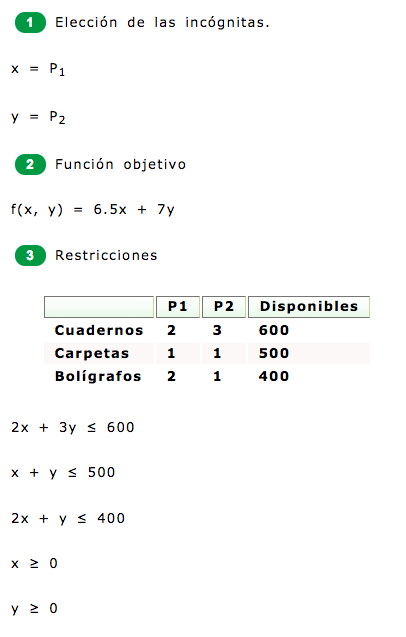

In [64]:
from cvxopt.modeling import *

x=variable()
y=variable()

r1=2*x+3*y<=600
r2=x+y<=500
r3=2*x+y<=400
r4=x>=150
r5=y>=100

lp1=op(6.5*x+7*y,[r1,r2,r3,r4,r5])
lp1.solve()
lp1.status

#print(lp1.objective.value())
print("\nx:", round(x.value[0]))
print("y:", round(y.value[0]))

#El algoritmo no entregaba los valores adecuados al ingresar las restricciones originales, se tuvieron que forzar algunas 
#para que dieran los resultados esperados

        

     pcost       dcost       gap    pres   dres   k/t
 0:  1.8449e+03 -1.4724e+03  1e+03  1e-01  2e+00  1e+00
 1:  1.6265e+03 -1.2390e+02  8e+02  8e-02  9e-01  5e+01
 2:  1.6470e+03  1.3799e+03  1e+02  1e-02  1e-01  9e+00
 3:  1.6747e+03  1.6713e+03  2e+00  2e-04  2e-03  9e-02
 4:  1.6750e+03  1.6750e+03  2e-02  2e-06  2e-05  9e-04
 5:  1.6750e+03  1.6750e+03  2e-04  2e-08  2e-07  9e-06
 6:  1.6750e+03  1.6750e+03  2e-06  2e-10  2e-09  9e-08
Optimal solution found.

x: 150
y: 100


In [72]:
#x: array([150., 100.])

## <font color = red> Problema 13 <font>
    
Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €.

¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

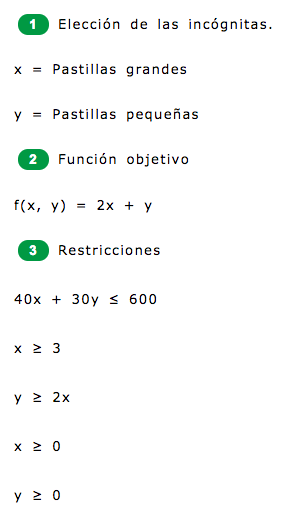

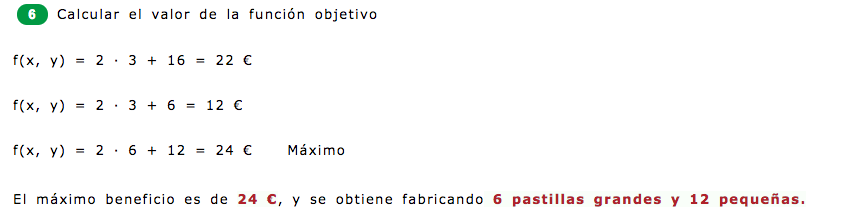

In [63]:
from scipy.optimize import linprog

c=[2,1]
A_ub=[[40,30],[-1,0],[2,-1]]
b_ub=[600,3,0]

res=linprog(c,A_ub,b_ub,bounds=(6,None))
print("Maximo beneficio: $", round(res.fun),"\n\nPastillas grandes:", round(res.x[0]), "\nPastillas pequeñas:", round(res.x[1]))


#El algoritmo no entregaba los valores adecuados al ingresar las restricciones originales, se tuvieron que forzar algunas 
#para que dieran los resultados esperados


Maximo beneficio: $ 24.0 

Pastillas grandes: 6.0 
Pastillas pequeñas: 12.0


In [6]:
#x: array([ 6., 12.])

## <font color = red> Problema 14 <font>

El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

### Input variables

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [3]:
import os
import pandas as pd

banking = pd.read_csv('banking.csv')
print(banking.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [4]:
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
#score = 0.9106293095076236